In [1]:
%pylab inline 
import numpy as np
from matplotlib import pylab
np.set_printoptions(precision=3, suppress=1, linewidth=100)

Populating the interactive namespace from numpy and matplotlib


In [7]:
from DeleteProposal import makeLPWithMinNonzeroValFromLP, makeDeleteMoveCandidate_LP, evaluateDeleteMoveCandidate_LP

In [8]:
import bnpy

In [9]:
import BarsK10V900
Data = BarsK10V900.get_data(nDocTotal=300, nWordsPerDoc=100)


In [10]:
LPkwargs = dict(
    nCoordAscentItersLP=50,
    convThrLP=0.001,
    restartLP=1,
    )

In [11]:
hmodel, Info = bnpy.run(Data, 'HDPTopicModel', 'Mult', 'moVB',
                        lam=0.1, alpha=0.5, gamma=10, 
                        nLap=10, nBatch=2, printEvery=25,
                        initname='truelabelsandjunk',
                        initKextra=1,
                       **LPkwargs)

{'initMinWordsPerDoc': 100, 'K': 6, 'initBlockLen': 20, 'initMinDocPerWord': 10, 'initarg': 0.0, 'taskid': 1, 'initLapFrac': -1.0, 'initDim': 1000, 'initLP': 'none'} <<<
[ 2332.823  2322.655  1853.305  2347.941  2466.96   2732.796  3096.074  2267.893  2346.962  2247.891
  1217.7  ]
Toy Bars Data with 10 true topics. Each doc uses 1-3 bars.
Entire Dataset Summary:
  total size: 300 units
  batch size: 150 units
  num. batches: 2
Data for Initialization:
  size: 300 units (documents)
  vocab size: 900
  min    5%   50%   95%   max 
   73    77    84    92    99  nUniqueTokensPerDoc
  100   100   100   100   100  nTotalTokensPerDoc
Hist of word_count across tokens 
      1      2      3    <10   <100  >=100
   0.84   0.14   0.02     61      0      0
Hist of unique docs per word type
     <1    <10   <100  >=100
      0      0   >.99      0
Allocation Model:  HDP model with K=11 active comps. gamma=10.00. alpha=0.50
Obs. Data  Model:  Multinomial over finite vocabulary.
Obs. Data  Prior:  

In [36]:
LP = hmodel.calc_local_params(Data, **LPkwargs)

curModel = hmodel.copy()
curLP = makeLPWithMinNonzeroValFromLP(Data, curModel, LP)
curSS = curModel.get_global_suff_stats(Data, curLP, doPrecompEntropy=1)

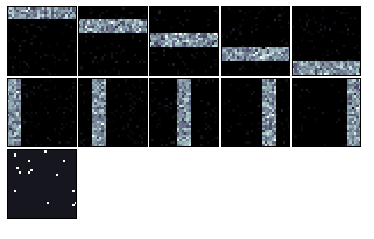

In [21]:
bnpy.viz.PlotComps.plotCompsFromHModel(hmodel)

# Create proposal with using "ground truth labels"

In [23]:
propLP_fromtruelabels = makeDeleteMoveCandidate_LP(Data, curLP, curModel, deleteStrategy='truelabels')

In [25]:
assert np.allclose(propLP_fromtruelabels['resp'].sum(), curLP['resp'].sum())

In [27]:
propModel_fromtrue, Result = evaluateDeleteMoveCandidate_LP(Data, curModel, curLP=curLP, propLP=propLP_fromtruelabels)

[(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19)]
 current ELBO: -6.15159
expanded ELBO: -6.17220
   final ELBO: -6.14914


In [30]:
curLP['DocTopicCount'][160:162, :]

array([[  7.266,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  83.99 ,   8.744,   0.   ,
          0.   ],
       [  0.   ,   0.   ,  82.514,   0.   ,   0.   ,   1.617,   1.371,   0.   ,   0.   ,   0.   ,
         14.498]])

In [31]:
propLP_fromtruelabels['DocTopicCount'][160:162, :]

array([[  7.266,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  83.99 ,   8.744,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,  82.514,   0.   ,   0.   ,   1.617,   1.371,   0.   ,   0.   ,   0.   ,
          3.981,   3.757,   3.475,   3.266,   0.003,   0.   ,   0.   ,   0.   ,   0.002,   0.014]])

# Create proposal with using "restricted E step" with current existing components

In [37]:
propLP_fromscratch = makeDeleteMoveCandidate_LP(Data, curLP, curModel, deleteStrategy='fromscratch')

In [38]:
propModel_fromscratch, Result = evaluateDeleteMoveCandidate_LP(Data, curModel, curLP=curLP, propLP=propLP_fromscratch)

[(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19)]
 current ELBO: -6.15159
expanded ELBO: -6.17256
   final ELBO: -6.14883


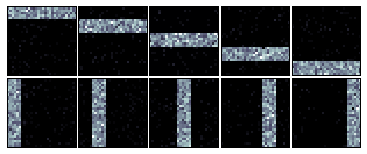

In [39]:
bnpy.viz.PlotComps.plotCompsFromHModel(propModel_fromscratch)